In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.patches as mpatches
from physoce import tseries as ts
from scipy.signal import welch
from scipy.stats import chi2
from scipy import stats

In [115]:
#load combined file from ADV processing code
os.chdir("c:/Users/steve/Desktop/STILL1/")
filename ="combined.8.03.17.csv"
filename2="combined.7.20.17.csv"
filename3='combined.8.10.17.csv'
df = pd.read_csv(filename)
df2 = pd.read_csv(filename2)
df3=pd.read_csv(filename2)
df4=pd.read_csv(filename3)

In [138]:
start_time1, end_time1 = (1401, 1421) #select start and end time of in kelp run 
start_time2, end_time2 = (1446, 1506)#select start and end time of out of bed run 
df['Time']= (df['Hour']*100)+ (df['Minute']) #make new time column for indexing in military time
runindex_in = (df['Time']>start_time1-1) & (df['Time']<end_time1+1) # index by start and end time for in bed run
runindex_out = (df['Time']>start_time2-1) & (df['Time']<end_time2+1) # index by start and end time for out of bed run
#file2
start_time1_f2, end_time1_f2 = (1045, 1105) #select start and end time of in kelp run 
start_time2_f2, end_time2_f2 = (1148, 1208)#select start and end time of out of bed run 
df2['Time']= (df2['Hour']*100)+ (df2['Minute']) #make new time column for indexing in military time
runindex_in_f2 = (df2['Time']>start_time1_f2-1) & (df2['Time']<end_time1_f2+1) # index by start and end time for in bed run
runindex_out_f2 = (df2['Time']>start_time2_f2-1) & (df2['Time']<end_time2_f2+1) # index by start and end time for out of bed run
#file3
start_time1_f3, end_time1_f3 = (1254, 1314) #select start and end time of in kelp run 
start_time2_f3, end_time2_f3 = (1343, 1403)#select start and end time of out of bed run 
df3['Time']= (df3['Hour']*100)+ (df3['Minute']) #make new time column for indexing in military time
runindex_in_f3 = (df3['Time']>start_time1_f3-1) & (df3['Time']<end_time1_f3+1) # index by start and end time for in bed run
runindex_out_f3 = (df3['Time']>start_time2_f3-1) & (df3['Time']<end_time2_f3+1) # index by start and end time for out of bed run
#file3
start_time1_f4, end_time1_f4 = (1108, 1128) #select start and end time of in kelp run 
start_time2_f4, end_time2_f4 = (1145, 1205)#select start and end time of out of bed run 
df4['Time']= (df4['Hour']*100)+ (df4['Minute']) #make new time column for indexing in military time
runindex_in_f4 = (df4['Time']>start_time1_f4-1) & (df4['Time']<end_time1_f4+1) # index by start and end time for in bed run
runindex_out_f4 = (df4['Time']>start_time2_f4-1) & (df4['Time']<end_time2_f4+1) # index by start and end time for out of bed run

In [139]:
#use PCA to rotate axis to make variable with most variation U
theta, major, minor=ts.princax(df['Velocity_East(m/s)'], df['Velocity_North(m/s)']) #theta = angle, major = SD major axis, SD minor axis 
U, V= ts.rot(df['Velocity_East(m/s)'], df['Velocity_North(m/s)'], -theta)
#file2
theta_f2, major_f2, minor_f2=ts.princax(df2['Velocity_East(m/s)'], df2['Velocity_North(m/s)']) #theta = angle, major = SD major axis, SD minor axis 
U_f2, V_f2= ts.rot(df2['Velocity_East(m/s)'], df2['Velocity_North(m/s)'], -theta_f2)
#file3
theta_f3, major_f3, minor_f3=ts.princax(df3['Velocity_East(m/s)'], df3['Velocity_North(m/s)']) #theta = angle, major = SD major axis, SD minor axis 
U_f3, V_f3= ts.rot(df3['Velocity_East(m/s)'], df3['Velocity_North(m/s)'], -theta_f3)
#file4
theta_f4, major_f4, minor_f4=ts.princax(df4['Velocity_East(m/s)'], df4['Velocity_North(m/s)']) #theta = angle, major = SD major axis, SD minor axis 
U_f4, V_f4= ts.rot(df4['Velocity_East(m/s)'], df4['Velocity_North(m/s)'], -theta_f4)

In [140]:
df['U'] = U
df['V']= V
#file2
df2['U'] = U_f2
df2['V']= V_f2
#file3
df3['U'] = U_f3
df3['V']= V_f3
#file4
df4['U'] = U_f4
df4['V']= V_f4

In [141]:
#make variables you want to play with 
U_in = df['U'][runindex_in]
U_out = df['U'][runindex_out]
N1 = (len(U_in))
N2 = (len(U_out))
#file2
U_in_f2 = df2['U'][runindex_in_f2]
U_out_f2 = df2['U'][runindex_out_f2]
N1_f2 = (len(U_in_f2))
N2_f2 = (len(U_out_f2))
#file3
U_in_f3 = df3['U'][runindex_in_f3]
U_out_f3 = df3['U'][runindex_out_f3]
N1_f3 = (len(U_in_f3))
N2_f3 = (len(U_out_f3))
#file4
U_in_f4 = df4['U'][runindex_in_f4]
U_out_f4 = df4['U'][runindex_out_f4]
N1_f4 = (len(U_in_f4))
N2_f4 = (len(U_out_f4))

<IPython.core.display.Javascript object>


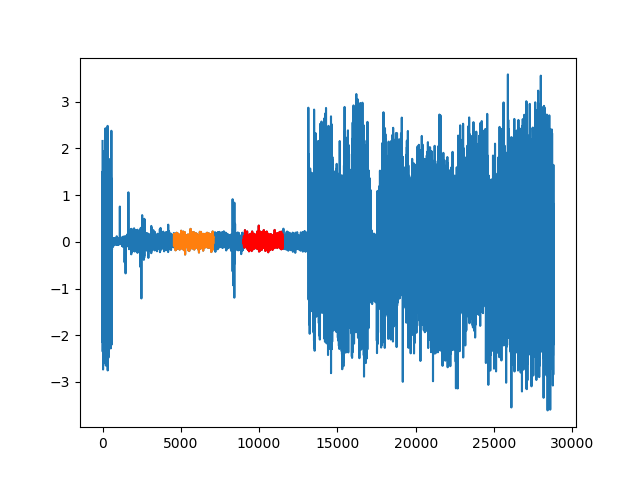

In [142]:
plt.figure()
plt.plot(U_f4)
plt.plot(U_in_f4)
plt.plot(U_out_f4, 'r')


plt.show()

In [143]:
U_fft_in = np.fft.fft(U_in) #Fast Fourier Transform alogorithm
U_fft_out = np.fft.fft(U_out)
#file2
U_fft_in_f2 = np.fft.fft(U_in_f2) #Fast Fourier Transform alogorithm
U_fft_out_f2 = np.fft.fft(U_out_f2)
#file3
U_fft_in_f3 = np.fft.fft(U_in_f3) #Fast Fourier Transform alogorithm
U_fft_out_f3 = np.fft.fft(U_out_f3)
#file4
U_fft_in_f4 = np.fft.fft(U_in_f4) #Fast Fourier Transform alogorithm
U_fft_out_f4 = np.fft.fft(U_out_f4)


<IPython.core.display.Javascript object>


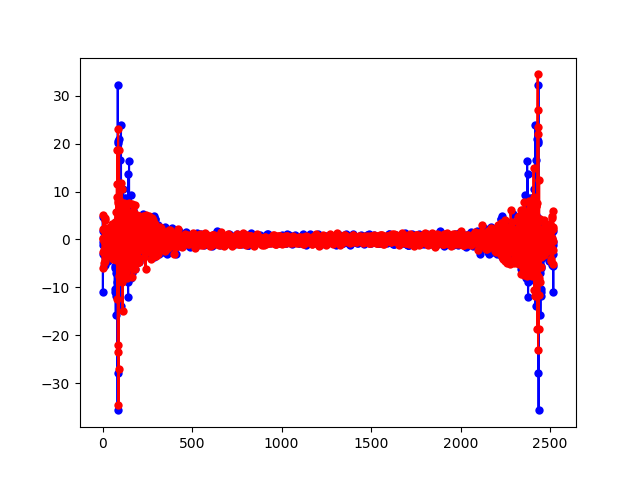

In [144]:
plt.figure()
plt.plot(np.real(U_fft_in),'b-o',markeredgecolor='none')
plt.plot(np.imag(U_fft_in),'r-o',markeredgecolor='none')
plt.show()

In [145]:
deltat1 = .5
deltat2 = .5
f_in = np.fft.fftfreq(N1,deltat1)
S_in = (2/N1)*deltat1*np.abs(U_fft_in)**2

f_out = np.fft.fftfreq(N2, deltat2)
S_out = (2/N2)*deltat2*np.abs(U_fft_out)**2
#file2

f_in_f2 = np.fft.fftfreq(N1_f2,deltat1)
S_in_f2 = (2/N1_f2)*deltat1*np.abs(U_fft_in_f2)**2

f_out_f2 = np.fft.fftfreq(N2_f2, deltat2)
S_out_f2 = (2/N2_f2)*deltat2*np.abs(U_fft_out_f2)**2
#file3

f_in_f3 = np.fft.fftfreq(N1_f3,deltat1)
S_in_f3 = (2/N1_f3)*deltat1*np.abs(U_fft_in_f3)**2

f_out_f3 = np.fft.fftfreq(N2_f3, deltat2)
S_out_f3 = (2/N2_f3)*deltat2*np.abs(U_fft_out_f3)**2
#file4

f_in_f4 = np.fft.fftfreq(N1_f4,deltat1)
S_in_f4 = (2/N1_f4)*deltat1*np.abs(U_fft_in_f4)**2

f_out_f4 = np.fft.fftfreq(N2_f4, deltat2)
S_out_f4 = (2/N2_f4)*deltat2*np.abs(U_fft_out_f4)**2

<IPython.core.display.Javascript object>


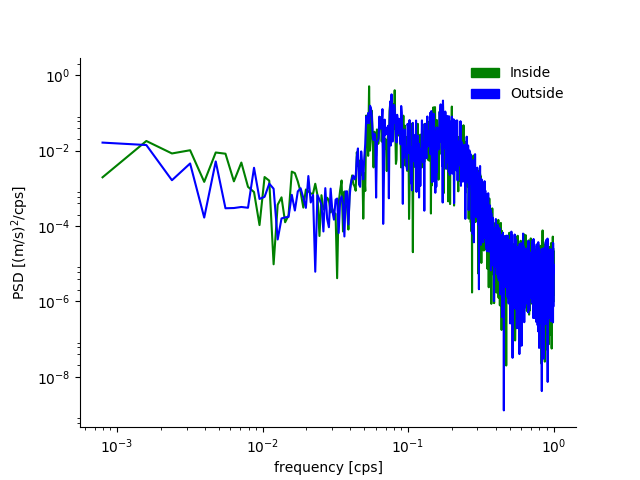

In [146]:
fig, ax = plt.subplots()

plt.loglog(f_in_f4[0:round(N1_f4/2)],S_in_f4[0:round(N1_f4/2)], 'g')
plt.loglog(f_out_f4[0:round(N2_f4/2)],S_out_f4[0:round(N2_f4/2)], 'b')
plt.xlabel('frequency [cps]')
plt.ylabel('PSD [(m/s)$^2$/cps]') #power spectral density 
green_patch = mpatches.Patch(color='green', label='Inside')
blue_patch = mpatches.Patch(color='blue', label='Outside')
plt.legend(loc = 1,bbox_to_anchor=(1, 1.01), handles=[green_patch, blue_patch], frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.savefig('run1_90stipesN.jpg', dpi=1000)
plt.show()

In [147]:
f2_in,S2_in = welch(U_in,fs=.5,nperseg=N1,window='boxcar') # boxcar
f2_out,S2_out = welch(U_out,fs=.5,nperseg=N2,window='boxcar')
f3_in, S3_in = welch(U_in,fs=.5,nperseg=N1,window='boxcar',detrend='linear')# pre-whitening 
f3_out, S3_out = welch(U_out, fs=.5, nperseg=N2, window='boxcar', detrend='linear')
f4_in,S4_in = welch(U_in,fs=2,nperseg=N1/8,window='hanning',detrend='linear')
f4_out,S4_out = welch(U_out,fs=2,nperseg=N2/8,window='hanning',detrend='linear')
#file2
f4_in_f2,S4_in_f2 = welch(U_in_f2,fs=2,nperseg=N1_f2/8,window='hanning',detrend='linear')
f4_out_f2,S4_out_f2 = welch(U_out_f2,fs=2,nperseg=N2_f2/8,window='hanning',detrend='linear')
#file3
f4_in_f3,S4_in_f3 = welch(U_in_f3,fs=2,nperseg=N1_f3/8,window='hanning',detrend='linear')
f4_out_f3,S4_out_f3 = welch(U_out_f3,fs=2,nperseg=N2_f3/8,window='hanning',detrend='linear')
#file4
f4_in_f4,S4_in_f4 = welch(U_in_f4,fs=2,nperseg=N1_f4/8,window='hanning',detrend='linear')
f4_out_f4,S4_out_f4 = welch(U_out_f4,fs=2,nperseg=N2_f4/8,window='hanning',detrend='linear')
#calculate confidance intervals 
a = ((1 - .95)/2) + .95   
b = 1 - a
DF = 8*2*(8/3)
    
upper=chi2_upper = stats.chi2.ppf(a,DF)
lower=chi2_lower = stats.chi2.ppf(b,DF)
#print(upper,lower)
lower_CI=((DF)/lower)
upper_CI=((DF)/upper)
print(N1,lower_CI,upper_CI)
np.shape(f4_in)
#np.shape(U_in)


2520 1.60867536694 0.681727478119


(158,)

<IPython.core.display.Javascript object>


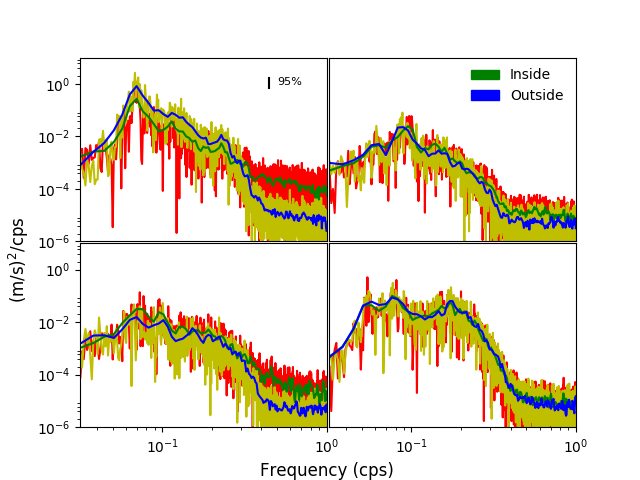

In [240]:
fig, ax = plt.subplots()
ax = [plt.subplot(2,2,i+1) for i in range(4)]

for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])

plt.subplots_adjust(wspace=.01, hspace=.01)
fplot=10**-.35
plt.subplot(2,2,1)
plt.loglog(f_in[0:round(N1/2)],S_in[0:round(N1/2)], 'r') #raw spectrum
plt.loglog(f_out[0:round(N2/2)],S_out[0:round(N2/2)], 'y')
plt.loglog(f4_in,S4_in, 'g')
plt.loglog(f4_out, S4_out, 'b')
plt.ylim([1e-6,1e1])
plt.xlim([10**-1.5,1])
plt.gca().tick_params(axis='x',labelbottom='off', which='both', bottom='off')
plt.xlabel('Frequency (cps)', fontsize='12')
plt.ylabel('(m/s)$^2$/cps', fontsize='12') #power spectral density 
plt.gca().yaxis.set_label_coords(-.2,-.1)
plt.gca().xaxis.set_label_coords(1,-1.2)

#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
plt.plot(np.array([fplot,fplot]), 1.05*np.array([upper_CI, lower_CI]), 'k-')
plt.text(fplot+.05, .9, '95%', fontsize='8')
#plt.savefig('PSD waypoint 10.jpg', dpi=1000)

plt.subplot(2,2,2)
plt.loglog(f_in_f2[0:round(N1_f2/2)],S_in_f2[0:round(N1_f2/2)], 'r') #raw spectrum
plt.loglog(f_out_f2[0:round(N2_f2/2)],S_out_f2[0:round(N2_f2/2)], 'y')
plt.loglog(f4_in_f2,S4_in_f2, 'g')
plt.loglog(f4_out_f2, S4_out_f2, 'b')
plt.ylim([1e-6,1e1])
plt.xlim([10**-1.5,1])
plt.gca().tick_params(axis='y',labelleft='off', which='both', left='off')
plt.gca().tick_params(axis='x',labelbottom='off', which='both', bottom='off')
green_patch = mpatches.Patch(color='green', label='Inside')
blue_patch = mpatches.Patch(color='blue', label='Outside')
plt.legend(bbox_to_anchor=(1, 1.01),loc=1, handles=[green_patch, blue_patch], frameon=False)

plt.subplot(2,2,3)
plt.loglog(f_in_f3[0:round(N1_f3/2)],S_in_f3[0:round(N1_f3/2)], 'r') #raw spectrum
plt.loglog(f_out_f3[0:round(N2_f3/2)],S_out_f3[0:round(N2_f3/2)], 'y')
plt.loglog(f4_in_f3,S4_in_f3, 'g')
plt.loglog(f4_out_f3, S4_out_f3, 'b')
plt.ylim([1e-6,1e1])
plt.xlim([10**-1.5,1])



plt.subplot(2,2,4)
plt.loglog(f_in_f4[0:round(N1_f4/2)],S_in_f4[0:round(N1_f4/2)], 'r') #raw spectrum
plt.loglog(f_out_f4[0:round(N2_f4/2)],S_out_f4[0:round(N2_f4/2)], 'y')
plt.loglog(f4_in_f4,S4_in_f4, 'g')
plt.loglog(f4_out_f4, S4_out_f4, 'b')
plt.ylim([1e-6,1e1])
plt.xlim([10**-1.5,1])
plt.gca().tick_params(axis='y', which='both',labelleft='off', left='off')
plt.savefig('wave_spectrum with raw.jpg', dpi=1000)
plt.show()
